In [2]:
import pandas as pd
import numpy as np
import os

# load the data

In [3]:
file_path = os.path.join('..', 'data', 'train.csv')

In [4]:
df = pd.read_csv(file_path, parse_dates = ['date'])

In [5]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


In [8]:
df.dtypes

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

In [22]:
df.sort_values(by = 'sales', ascending = False).head(10)

,date,store,item,sales
259109,2017-07-02,2,15,231
386579,2016-07-17,2,22,214
222596,2017-07-09,2,13,210
258759,2016-07-17,2,15,209
313889,2017-07-02,2,18,208
258752,2016-07-10,2,15,207
496495,2017-07-08,2,28,206
806930,2017-07-23,2,45,205
259116,2017-07-09,2,15,205
806909,2017-07-02,2,45,205


In [23]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 45.0 MB/s eta 0:00:00 MB/s eta 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [seaborn]━━━━━━━━━━ 5/7 [matplotlib]

[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize']=(12, 8)

In [38]:
# ---------------------------------------------------------
# 4. PRODUCT MAPPING (The "Business Context")
# ---------------------------------------------------------
# We are simulating a real catalog. 
# Low Volume Items = High Price (Luxury)
# High Volume Items = Low Price (Commodity)

product_catalog = {
    1:  {'name': 'Sony WH-1000XM5 Headphones', 'price': 350},  
    4:  {'name': 'Samsung Odyssey Monitor', 'price': 450},      
    5:  {'name': 'Sony PlayStation 5', 'price': 500},           
    15: {'name': 'USB-C Charging Cable', 'price': 15},          
    28: {'name': 'AA Batteries (Pack of 4)', 'price': 12},      
}

def get_product_details(item_id):
    # If we have a specific mapping, use it
    if item_id in product_catalog:
        return product_catalog[item_id]
    
    # Otherwise, generate a "Generic" name and price based on ID
    # (This ensures we don't have empty values for items 6-14, etc.)
    estimated_price = max(10, 100 - item_id) 
    return {'name': f'Generic Tech Item {item_id}', 'price': estimated_price}

# Apply the logic to create new columns
print("Mapping Product Names and Prices...")
df['product_name'] = df['item'].apply(lambda x: get_product_details(x)['name'])
df['price'] = df['item'].apply(lambda x: get_product_details(x)['price'])

# ---------------------------------------------------------
# 5. CALCULATE REVENUE (The "KPI")
# ---------------------------------------------------------
# Executives don't care about "units sold." They care about dollars.
df['revenue'] = df['sales'] * df['price']

# Let's inspect our new "Enriched" DataFrame
print("Enrichment Complete!")
df[['date', 'product_name', 'sales', 'price', 'revenue']].sample(5)

Mapping Product Names and Prices...
Enrichment Complete!


,date,product_name,sales,price,revenue
816267,2013-02-15,Generic Tech Item 45,69,55,3795
900538,2013-11-17,Generic Tech Item 50,68,50,3400
368783,2017-10-24,Generic Tech Item 21,41,79,3239
2728,2015-06-22,Sony WH-1000XM5 Headphones,25,350,8750
888234,2015-03-10,Generic Tech Item 49,19,51,969


### Finding trends

In [26]:
daily_sales = df.groupby('date')['sales'].sum().reset_index()

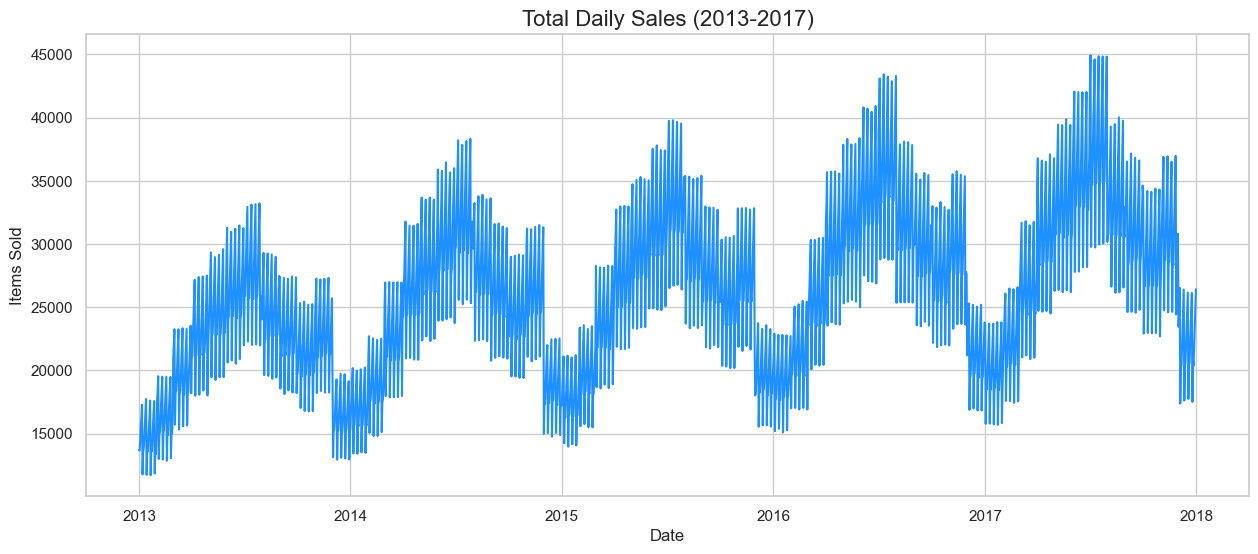

In [29]:
plt.figure(figsize =(15,6))
sns.lineplot(data = daily_sales, x='date', y='sales', color='dodgerblue')
plt.title('Total Daily Sales (2013-2017)', fontsize=16)
plt.ylabel('Items Sold')
plt.xlabel('Date')
plt.show()

### Seasonality

In [30]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day_of_week'] = df['date'].dt.day_name()

#### Monthly

/var/folders/wn/r7x1lgdn7919w5n4zf_09h2r0000gn/T/ipykernel_84911/4046610101.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x='month', y='sales', palette='viridis')


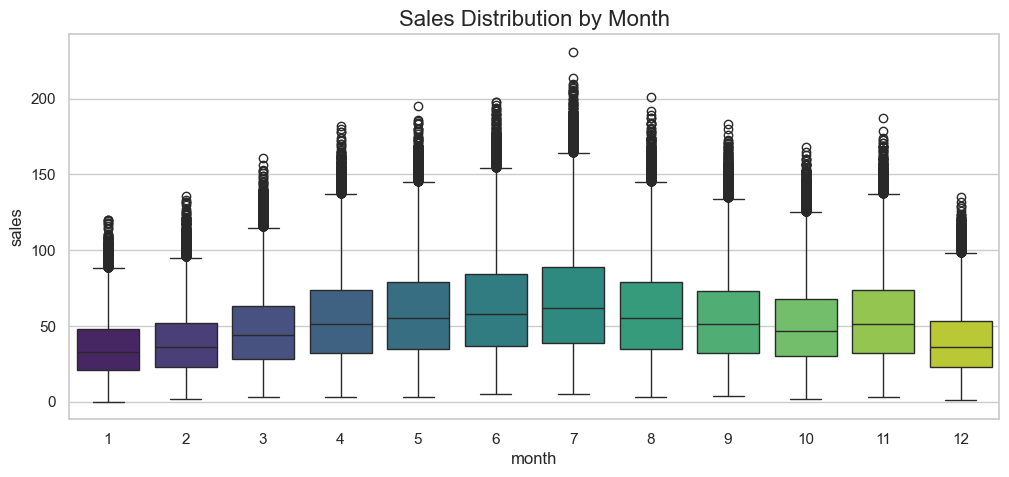

In [31]:
plt.figure(figsize=(12,5))
sns.boxplot(data = df, x='month', y='sales', palette='viridis')
plt.title('Sales Distribution by Month', fontsize=16)
plt.show()

#### Weekly

/var/folders/wn/r7x1lgdn7919w5n4zf_09h2r0000gn/T/ipykernel_84911/419881474.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='day_of_week', y='sales',order=order, palette='magma')


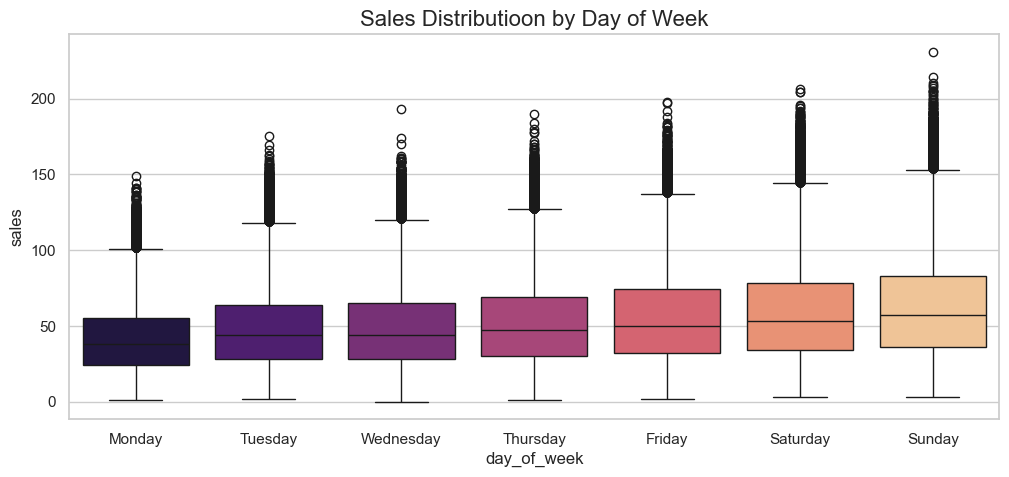

In [35]:
order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='day_of_week', y='sales',order=order, palette='magma')
plt.title('Sales Distributioon by Day of Week', fontsize=16)
plt.show()

### Top sellers

/var/folders/wn/r7x1lgdn7919w5n4zf_09h2r0000gn/T/ipykernel_84911/2282889001.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_performance.values, y=product_performance.index, palette='coolwarm')


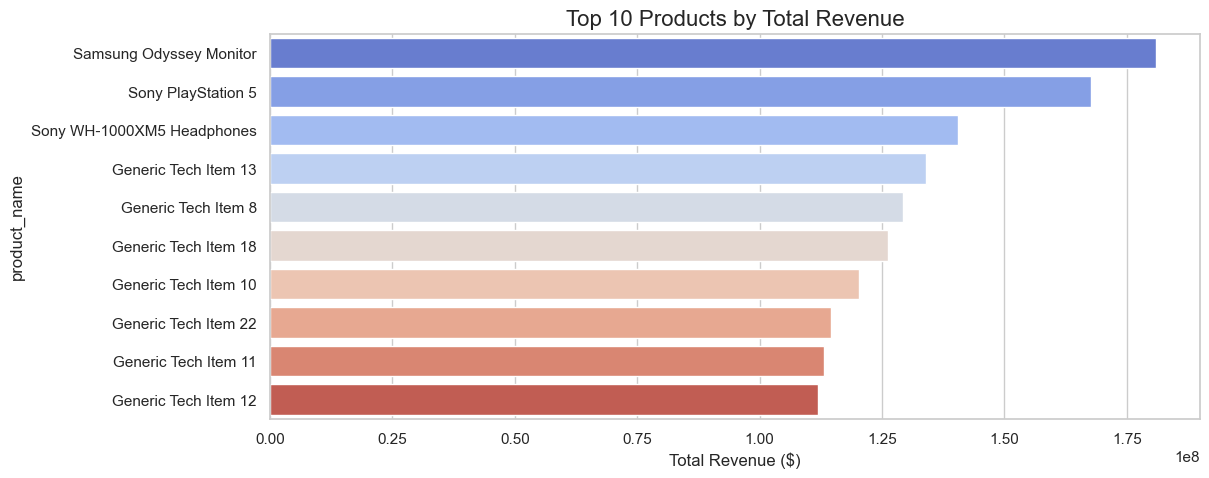

In [39]:
product_performance = df.groupby('product_name')['revenue'].sum().sort_values(ascending=False).head(10)

#plot
plt.figure(figsize=(12,5))
sns.barplot(x=product_performance.values, y=product_performance.index, palette='coolwarm')
plt.title('Top 10 Products by Total Revenue', fontsize=16)
plt.xlabel('Total Revenue ($)')
plt.show()

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [41]:
sample_data = df[(df['store'] == 1) & (df['item'] == 5)].set_index('date')['sales']


### Autocorrelation plot

<Figure size 1200x600 with 0 Axes>

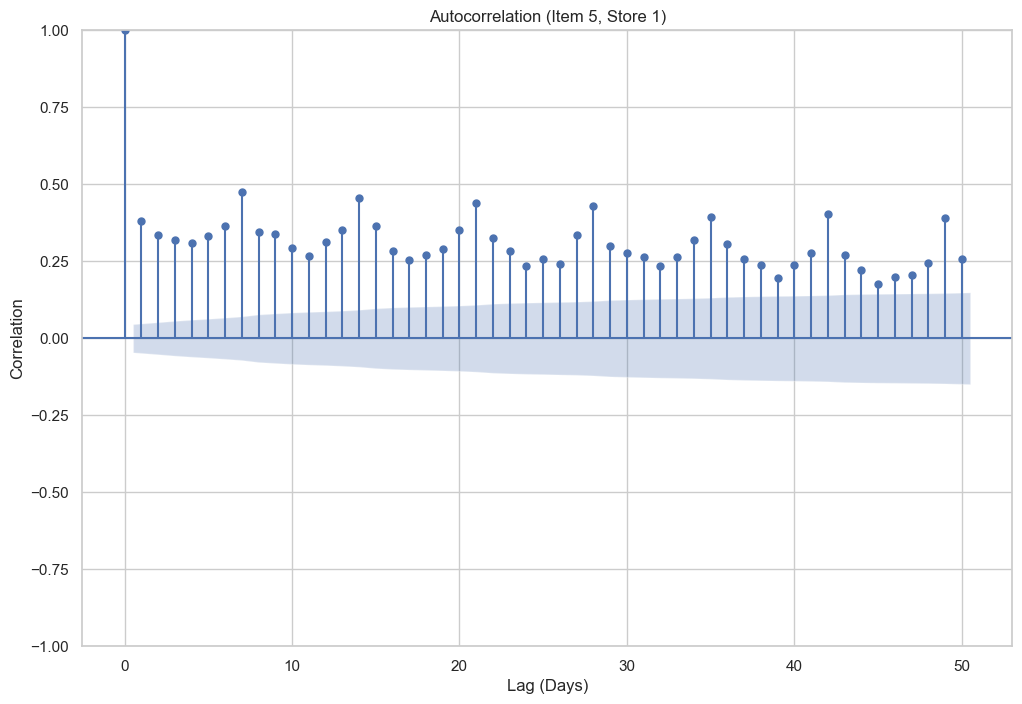

In [42]:
plt.figure(figsize=(12,6))
plot_acf(sample_data, lags=50, title='Autocorrelation (Item 5, Store 1)')
plt.xlabel('Lag (Days)')
plt.ylabel('Correlation')
plt.show()

### Time Series Decomposition 

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

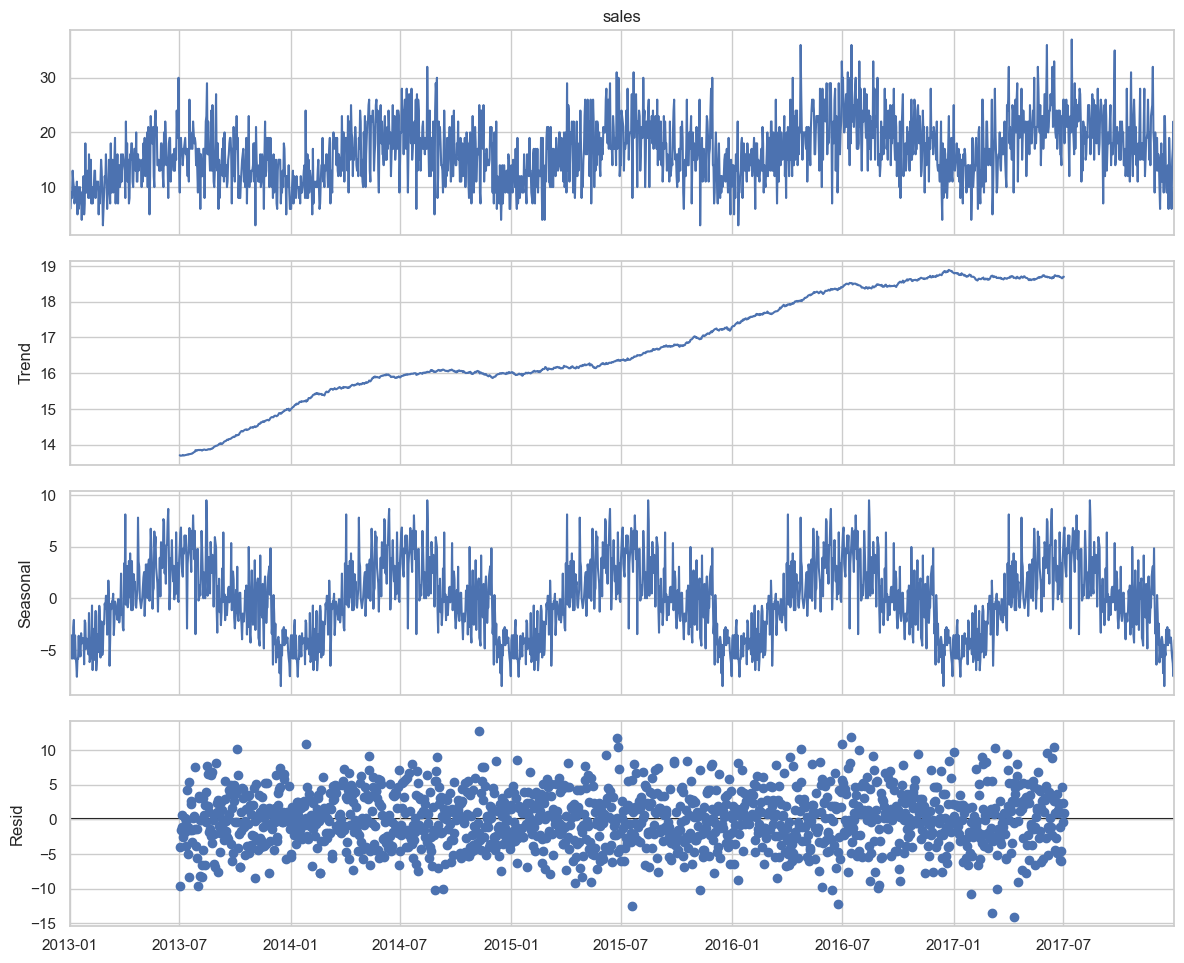

In [44]:
decomposition = seasonal_decompose(sample_data, model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(12,10)
plt.show()

### Feature Engineering

In [45]:
df = df.sort_values(['store', 'item', 'date'])

#### Create lags

In [46]:
df['sales_lag_1'] = df.groupby(['store', 'item'])['sales'].shift(1)
df['sales_lag_7'] = df.groupby(['store', 'item'])['sales'].shift(7)

#### Create rolling mean

In [47]:
df['rolling_mean_7'] = df.groupby(['store', 'item'])['sales'].transform(lambda x: x.shift(1).rolling(window=7).mean())

#### Drop empty row for first 7 days

In [48]:
df = df.dropna()

In [49]:
output_path = os.path.join('..', 'data', 'processed_data.csv')
df.to_csv('processed_data.csv', index=False)